In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

x,y = load_breast_cancer(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

#calling models

models={"DecisionTree":DecisionTreeRegressor(random_state=42),
        "RandomForest":RandomForestRegressor(n_estimators=100,random_state=42),
        "GradientBoosting":GradientBoostingRegressor(n_estimators=300,learning_rate=0.05,max_features=5,random_state=42),
        "Adaboost":AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1),
                                     random_state=42,n_estimators=50)}

## looping all models:
## to train and evaluate
result = []
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    result.append((name,mse,r2))

#making dataframe of result of models
result_df = pd.DataFrame(result,columns=["Model","MSE","R2_Score"])

print(result_df)

              Model       MSE  R2_Score
0      DecisionTree  0.048951  0.791719
1      RandomForest  0.033799  0.856188
2  GradientBoosting  0.028513  0.878680
3          Adaboost  0.044412  0.811030


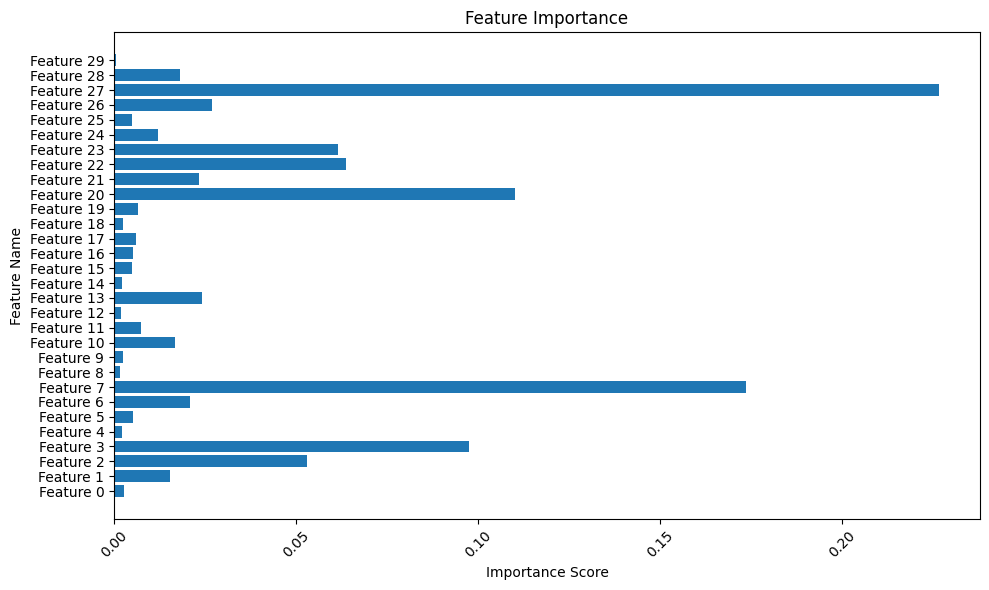

In [6]:
importance = models["GradientBoosting"].feature_importances_  # Generate dummy feature names as the loaded dataset does not provide them
feature_names = [f"Feature {i}" for i in range(x.shape[1])]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(feature_names,importance, align="center")
plt.xticks(rotation=45)
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")                                    # Corrected ylabel
plt.tight_layout()
plt.show()

In [8]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBClassifier(use_label_encoder =False,eval_metrics='logloss')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


LOGLOSS POINTS

In [9]:
from xgboost import plot_importance

model = XGBClassifier(use_label_encoder =False,eval_metrics='logloss',n_estimators = 100,learning_rate=0.1,verbosity=0)

model.fit(X_train,y_train,eval_set=[(X_test,y_test)])

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

[0]	validation_0-logloss:0.58921
[1]	validation_0-logloss:0.52730
[2]	validation_0-logloss:0.47376
[3]	validation_0-logloss:0.42879
[4]	validation_0-logloss:0.39063
[5]	validation_0-logloss:0.36157
[6]	validation_0-logloss:0.33429
[7]	validation_0-logloss:0.31174
[8]	validation_0-logloss:0.29004
[9]	validation_0-logloss:0.26887
[10]	validation_0-logloss:0.25026
[11]	validation_0-logloss:0.23664
[12]	validation_0-logloss:0.22159
[13]	validation_0-logloss:0.21042
[14]	validation_0-logloss:0.20015
[15]	validation_0-logloss:0.18927
[16]	validation_0-logloss:0.18089
[17]	validation_0-logloss:0.17455
[18]	validation_0-logloss:0.16700
[19]	validation_0-logloss:0.16112
[20]	validation_0-logloss:0.15695
[21]	validation_0-logloss:0.15202
[22]	validation_0-logloss:0.14771
[23]	validation_0-logloss:0.14215
[24]	validation_0-logloss:0.13778
[25]	validation_0-logloss:0.13256
[26]	validation_0-logloss:0.13073
[27]	validation_0-logloss:0.12973
[28]	validation_0-logloss:0.12838
[29]	validation_0-loglos

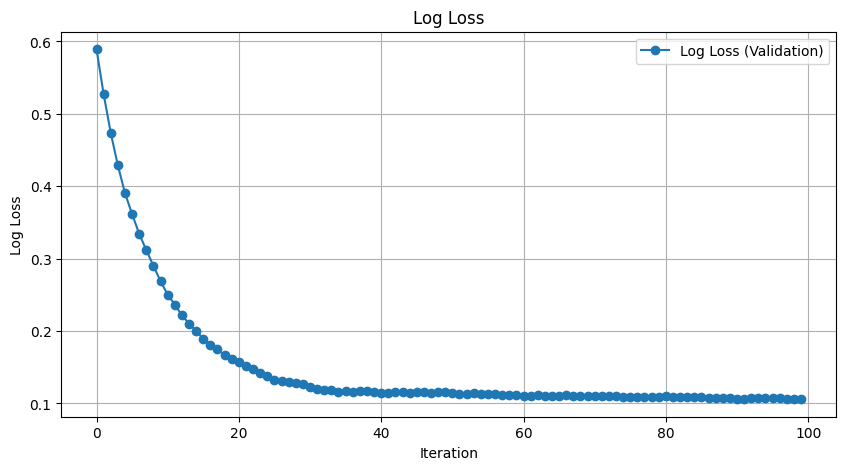

In [10]:
eval_result = model.evals_result()
logloss = eval_result['validation_0']['logloss']
plt.figure(figsize=(10,5))
plt.plot(logloss, marker = "o", label = "Log Loss (Validation)")
plt.title("Log Loss")
plt.grid(True)
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.legend()
plt.show()

FINDING RUNTIME OF DIFFERENT MODELS



In [11]:
import time
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore") # Import GradientBoostingClassifier

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBClassifier(use_label_encoder =False,eval_metrics='logloss')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

models={"XGBoot":XGBClassifier(use_label_encoder =False,eval_metrics='logloss',random_state=42),
        "RandomForest":RandomForestClassifier(n_estimators=100,random_state=42),
        "GradientBoosting":GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_features=5,random_state=42),
       }
result = []

for name,model in models.items():
    start = time.time()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    duration = time.time() - start
    result.append({"Model":name,"Accuracy":acc,"Duration":round(duration,4)})

df=pd.DataFrame(result)
df

,Model,Accuracy,Duration
0,XGBoot,0.956140,0.0795
1,RandomForest,0.964912,0.2947
2,GradientBoosting,0.964912,0.6936


HYPER PARAMETER TUNING OF DIFFERENT MODELS FOR BEST PERFORMANCE

In [13]:
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
from sklearn.model_selection import GridSearchCV

X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model = XGBClassifier(use_label_encoder =False,eval_metrics='logloss')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

models={"XGBoot":(XGBClassifier(use_label_encoder =False,eval_metrics='logloss',random_state=42, verbosity=0),{
            'n_estimators':[100,150],
              'learning_rate':[0.05,0.1],
              'max_depth':[3,5],
}),
        "RandomForest":(RandomForestClassifier(n_estimators=100,random_state=42),{
            'n_estimators':[100,150],
              'max_depth':[3,5],
        }),
        "GradientBoosting":(GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,max_features=5,random_state=42),{
            'n_estimators':[100,150],
              'learning_rate':[0.05,0.1],
              'max_depth':[3,5],
        })
       }

result = []
for name, (model, param_grid_model) in models.items():
    start = time.time()
    grid = GridSearchCV(estimator = model,param_grid = param_grid_model ,cv=3,scoring='accuracy',n_jobs= -1)
    grid.fit(X_train,y_train)
    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    duration = time.time() - start
    result.append({"Model":name,"Best Parameters":grid.best_params_,"Best Accuracy":grid.best_score_,"Test Accuracy":acc,"Duration":round(duration,4)})


df=pd.DataFrame(result)
df

,Model,Best Parameters,Best Accuracy,Test Accuracy,Duration
0,XGBoot,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.969226,0.956140,8.1418
1,RandomForest,"{'max_depth': 5, 'n_estimators': 150}",0.953817,0.964912,3.2062
2,GradientBoosting,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",0.964811,0.956140,6.6633
